In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os

In [21]:
# to modify based on the data directory
root_directory = os.getcwd().removesuffix('notebooks')
data_path = r'D:/Data/d18o_so/'
fig_path = root_directory + '/figures/rcst_OCIM_d18oproduct_w5frac/'

In [3]:
import sys
sys.path.append(root_directory + 'scripts/') # go to parent dir

import usefull_functions as uf

%load_ext autoreload
%autoreload 2

In [4]:
if not os.path.exists(root_directory + fig_path): os.mkdir(root_directory + fig_path)

# Can we reconstruct the deep d18o structure of the OCIM product with 5 fractions?

In [5]:
ocim_frac = xr.open_dataset(data_path + 'Holzer_water_mass_fractions.nc')
l_lat_ocim, l_lon_ocim, l_depth_ocim = ocim_frac['yt'].values, ocim_frac['xt'].values, ocim_frac['zt'].values

In [6]:
d18o_EM = np.array([-0.3, -0.3, -0.35, 0.088, 0.4]) # the d18o values needed to correctly represent the deep d18o structure, EM order
reconstd_d18o = np.nansum([d18o_EM[i] * ocim_frac['fs_3d'].values[i] for i in range(5)], axis = 0); reconstd_d18o[np.isnan(ocim_frac['fs_3d'].values[0])] = np.nan

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19148\831249474.py:11: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xticks([-0.4 + 0.1 * i for i in range(9)]); ax.set_xticklabels(['', '-0.3', '', '-0.1', '', '0.1', '', '0.3', ''], fontsize = font); ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19148\831249474.py:20: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xticks([-0.4 + 0.1 * i for i in range(9)]); ax.set_xticklabels(['', '-0.3', '', '-0.1', '', '0.1', '', '0.3', ''], fontsize = font); ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19148\831249474.py:

Text(0.5, 1.0, '159°E, -55.38°N')

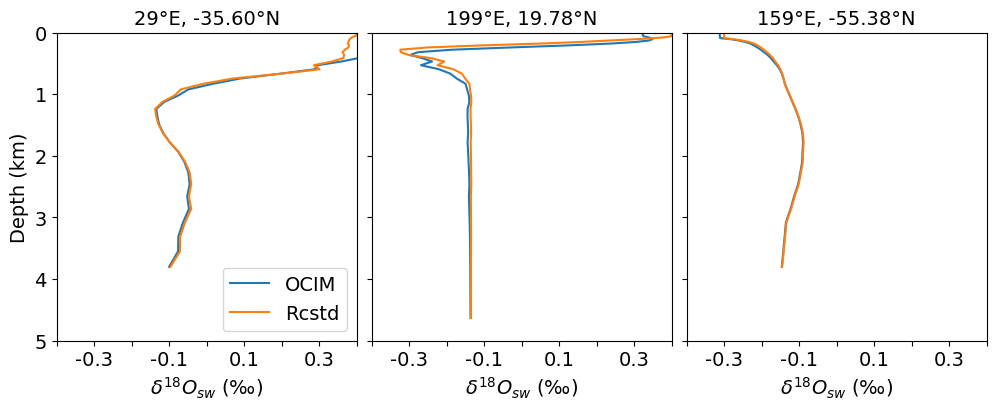

In [ ]:
fig = plt.figure(figsize = (12, 4)); gs = fig.add_gridspec(1, 3, wspace = 0.05); font = 14

ilon, ilat = uf.approx_depth(30, l_lon_ocim)[1], uf.approx_depth(-35, l_lat_ocim)[1]
ilon2, ilat2 = uf.approx_depth(200, l_lon_ocim)[1], uf.approx_depth(20, l_lat_ocim)[1]
ilon3, ilat3 = uf.approx_depth(160, l_lon_ocim)[1], uf.approx_depth(-55, l_lat_ocim)[1]

ax = fig.add_subplot(gs[0, 0])
ax.plot(ocim_frac['d18o_pre_3d'][:, ilat, ilon].values, l_depth_ocim, label = 'OCIM')
ax.plot(reconstd_d18o[:, ilat, ilon], l_depth_ocim, label = 'Rcstd')
ax.set_ylim(5000, 0); ax.set_xlim(-0.4, 0.4)
ax.set_xticks([-0.4 + 0.1 * i for i in range(9)]); ax.set_xticklabels(['', '-0.3', '', '-0.1', '', '0.1', '', '0.3', ''], fontsize = font); ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
ax.set_yticks([1000 * i for i in range(6)]); ax.set_yticklabels([i for i in range(6)], fontsize = font); ax.set_ylabel('Depth (km)', fontsize = font)
ax.legend(fontsize = font, loc = 'lower right')
ax.set_title(str(int(l_lon_ocim[ilon])) +'°E, ' + format(l_lat_ocim[ilat], '.2f') + '°N', fontsize = font)

ax = fig.add_subplot(gs[0, 1])
ax.plot(ocim_frac['d18o_pre_3d'][:, ilat2, ilon2].values, l_depth_ocim, label = 'OCIM')
ax.plot(reconstd_d18o[:, ilat2, ilon2], l_depth_ocim, label = 'Rcstd')
ax.set_ylim(5000, 0); ax.set_xlim(-0.4, 0.4)
ax.set_xticks([-0.4 + 0.1 * i for i in range(9)]); ax.set_xticklabels(['', '-0.3', '', '-0.1', '', '0.1', '', '0.3', ''], fontsize = font); ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
ax.set_yticks([1000 * i for i in range(6)]); ax.set_yticklabels([], fontsize = font)
ax.set_title(str(int(l_lon_ocim[ilon2])) +'°E, ' + format(l_lat_ocim[ilat2], '.2f') + '°N', fontsize = font)

ax = fig.add_subplot(gs[0, 2])
ax.plot(ocim_frac['d18o_pre_3d'][:, ilat3, ilon3].values, l_depth_ocim, label = 'OCIM')
ax.plot(reconstd_d18o[:, ilat3, ilon3], l_depth_ocim, label = 'Rcstd')
ax.set_ylim(5000, 0); ax.set_xlim(-0.4, 0.4)
ax.set_xticks([-0.4 + 0.1 * i for i in range(9)]); ax.set_xticklabels(['', '-0.3', '', '-0.1', '', '0.1', '', '0.3', ''], fontsize = font); ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
ax.set_yticks([1000 * i for i in range(6)]); ax.set_yticklabels([], fontsize = font)
ax.set_title(str(int(l_lon_ocim[ilon3])) +'°E, ' + format(l_lat_ocim[ilat3], '.2f') + '°N', fontsize = font)

# plt.savefig(fig_path + 'profiles_examples.png', bbox_inches = 'tight')

# How does it compare to the SO GISS compilation

In [9]:
import custom_density_scale

In [10]:
dsClim = xr.open_dataset(data_path + "climatology_Brunov2.nc")
l_lat_cas, l_lon_cas, mask_cas = dsClim['lat'].values, dsClim['lon'].values, dsClim['basin_masks'].values
l_lon_cas_3D, l_lat_cas_3D = np.meshgrid(l_lon_cas, l_lat_cas); l_depth0 = uf.create_l_depth()

In [16]:
import cartopy.crs as ccrs
from scipy.interpolate import RegularGridInterpolator

interpolator_d18o_ocim = RegularGridInterpolator((l_depth_ocim, l_lat_ocim, l_lon_ocim), ocim_frac['d18o_pre_3d'].values, bounds_error = False, fill_value = None)
interpolator_d18o_ocim_rcstd = RegularGridInterpolator((l_depth_ocim, l_lat_ocim, l_lon_ocim), reconstd_d18o, bounds_error = False, fill_value = None)

interpolator_gamma = RegularGridInterpolator((l_depth0, l_lat_cas, l_lon_cas), dsClim['gamma'].values, bounds_error = False, fill_value = None)
interpolator_salinity = RegularGridInterpolator((l_depth0, l_lat_cas, l_lon_cas), dsClim['absolute_salinity'].values, bounds_error = False, fill_value = None)

In [12]:
d18o_SO = pd.read_table(data_path + 'giss_d18o_SO.txt')

In [13]:
d18o_SO['Longitude'] = [lon if lon >= 0 else 360 + lon for lon in d18o_SO['Longitude']]
d18o_SO.where((d18o_SO['Depth'] != -999.0) & (d18o_SO['d18O'] != '**'), np.nan, inplace = True)
d18o_SO['d18O'] = d18o_SO['d18O'].astype(float)
d18o_SO['Gamma'] = interpolator_gamma((d18o_SO['Depth'], d18o_SO['Latitude'], d18o_SO['Longitude']))
d18o_SO['absolute_salinity'] = interpolator_salinity((d18o_SO['Depth'], d18o_SO['Latitude'], d18o_SO['Longitude']))

In [14]:
lon_min, lon_max = 0, 360 ; gamma_min, gamma_max = 27, 28.5
aux = d18o_SO.where((d18o_SO['Longitude'] <= lon_max) & (d18o_SO['Longitude'] >= lon_min) & (d18o_SO['Gamma'] <= gamma_max) & (d18o_SO['Gamma'] >= gamma_min)).dropna()

In [17]:
aux['d18O_ocim'] = interpolator_d18o_ocim((aux['Depth'], aux['Latitude'], aux['Longitude']))
aux['d18O_ocim_rcstd'] = interpolator_d18o_ocim_rcstd((aux['Depth'], aux['Latitude'], aux['Longitude']))

In [18]:
dfs = uf.create_dfs(aux)

<>:22: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\g'
<>:22: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\g'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19148\539689511.py:22: SyntaxWarning: invalid escape sequence '\g'
  ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.1, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19148\539689511.py:24: SyntaxWarning: invalid escape sequence '\d'
  if xlabels: ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_19148\539689511.py:25: SyntaxWarning: invalid escape sequence '\g'
  if ylabels: ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, label

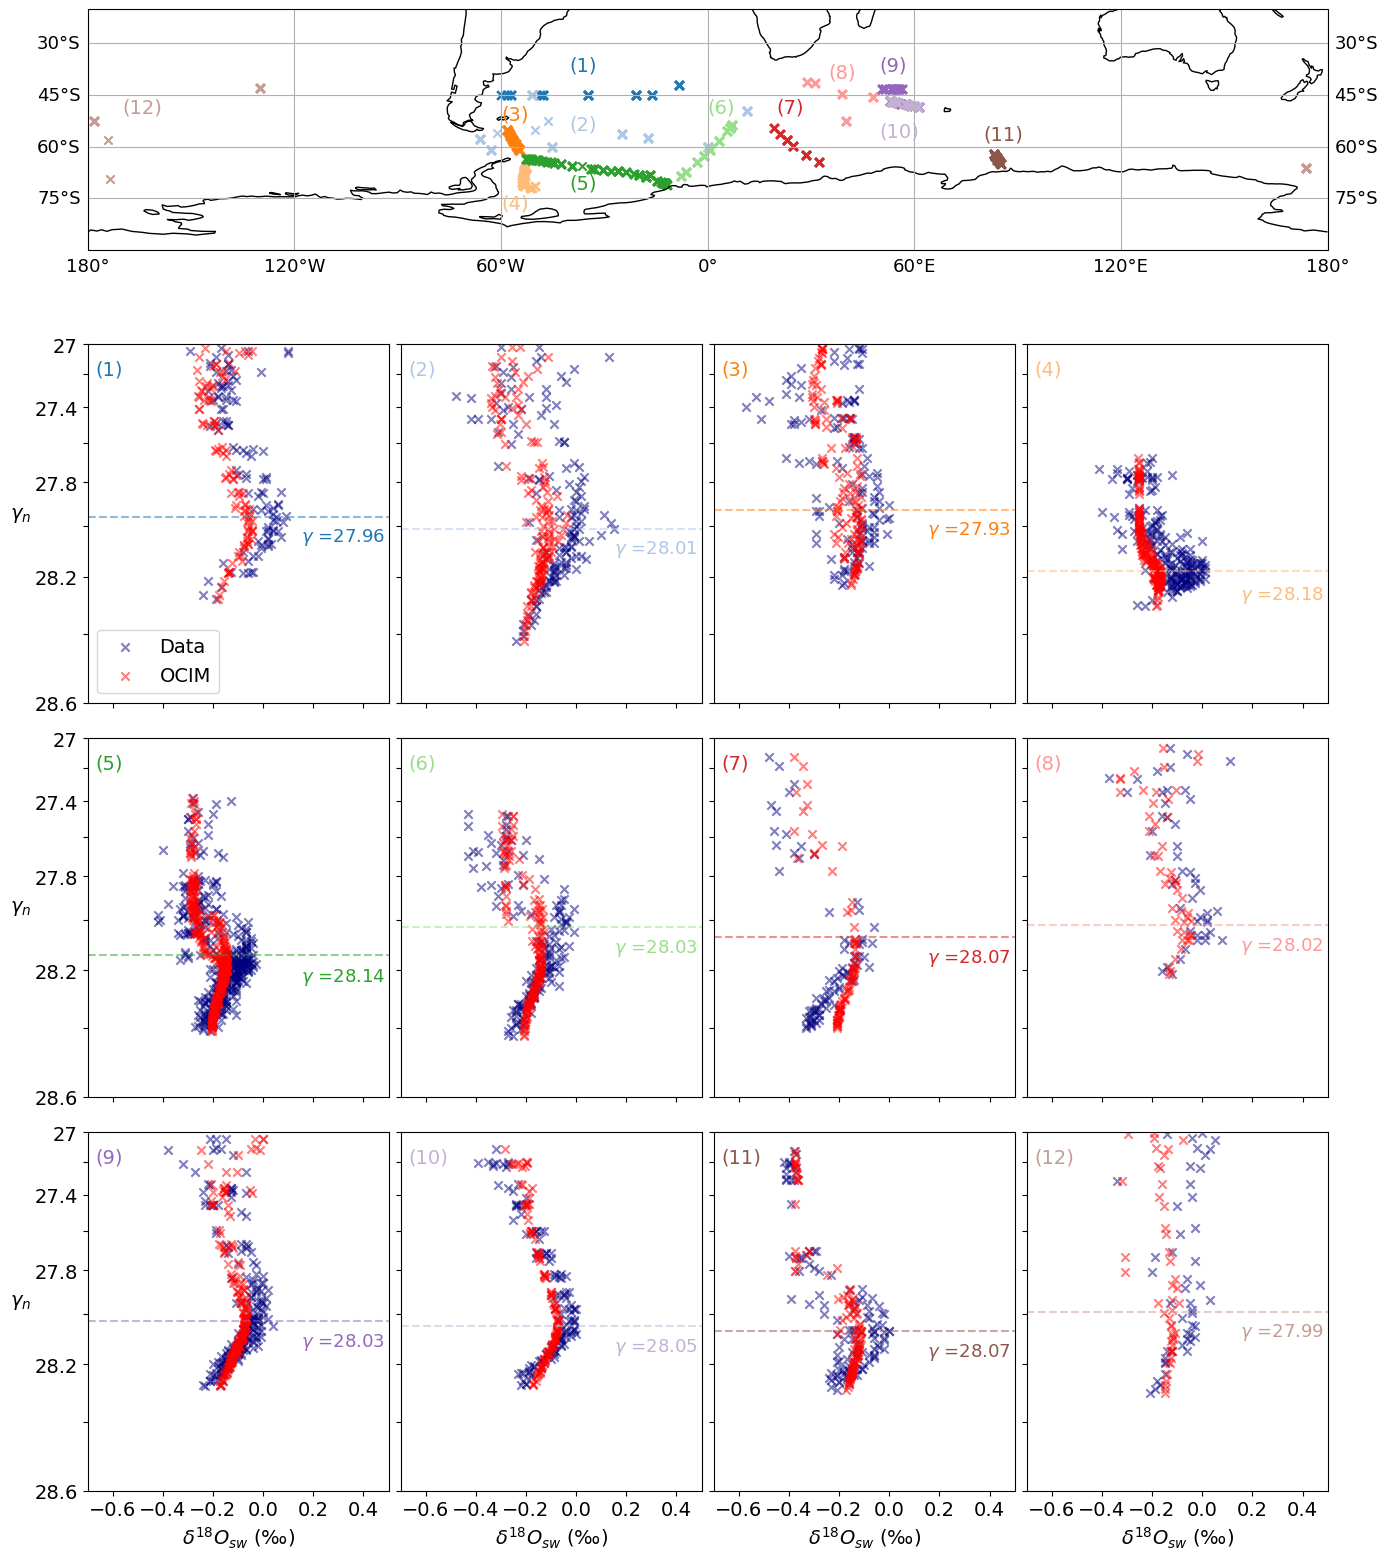

In [ ]:
fig = plt.figure(figsize = (16, 20)); gs = fig.add_gridspec(4, 4, wspace = 0.04, hspace = 0.1); font = 14

ax = fig.add_subplot(gs[0, :], projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
gl = ax.gridlines(draw_labels = {'bottom': 'x', 'right': 'y', 'left': 'y'}, ylocs = [-90 + 15 * i for i in range(5)])
gl.xlabel_style = {'size': font - 1}; gl.ylabel_style = {'size': font - 1}
ax.set_ylim(-90, -20); ax.set_xlim(-180, 180)
couleurs = plt.cm.tab20(range(12))
for i in range(12):
    ax.scatter(dfs[i]['Longitude'], dfs[i]['Latitude'], color = couleurs[i], marker = 'x')
    ax.text(uf.coords_dataset[i][0], uf.coords_dataset[i][1], '(' + str(i+1) + ')', fontsize = font, color = couleurs[i])

norm_S = uf.get_BoundNorm(34, 35, nbins = 20)
for i in range(12):
    i_row, i_col = i//4 + 1, i%4; xlabels, ylabels = uf.get_xylabels(3, 4, i)
    
    ax = fig.add_subplot(gs[i_row, i_col])
    sc = ax.scatter(dfs[i]['d18O'], dfs[i]['Gamma'], marker = 'x', c = 'navy', alpha = 0.5, label = 'Data') #, norm = norm_S)
    ax.scatter(dfs[i]['d18O_ocim'], dfs[i]['Gamma'], marker = 'x', c = 'red', alpha = 0.5, label = 'OCIM')

    if i ==0: ax.legend(fontsize = font)
    ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.1, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
    
    if xlabels: ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
    if ylabels: ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, labelpad = 10)

    ax.text(-0.67, 27.2, '(' + str(i + 1) + ')', fontsize = font, color = couleurs[i])
    ax.set_yscale('custom_scale')
    uf.plot_details_axis(ax, sc, cb = False, xlim = (-0.7, 0.5), ylim = (28.6, 27), nbins = 20, xticks = [-0.6 + 0.2*i for i in range(6)], yticks = [27 + 0.2*i for i in range(9)], font = font, xlabels = xlabels, ylabels = ylabels)
    ax.invert_yaxis()
    if ylabels: ax.set_yticklabels(['27', '', '27.4', '', '27.8', '', '28.2', '', '28.6'], fontsize = font)

# plt.savefig(fig_path + 'd18o_profiles_SO_map_OCIM.png', bbox_inches = 'tight')